<a href="https://colab.research.google.com/github/AvantiShri/BioMate/blob/master/ThermoclineEndMemberDefinition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gsw

     |████████████████████████████████| 2.4 MB 6.5 MB/s 


In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr" -O GLODAPv2.2019_Pacific_Ocean.csv && rm -rf /tmp/cookies.txt

--2021-09-13 01:59:12--  https://docs.google.com/uc?export=download&confirm=oSvy&id=1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr
Resolving docs.google.com (docs.google.com)... 142.250.141.113, 142.250.141.138, 142.250.141.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-6c-docs.googleusercontent.com/docs/securesc/l4ugi2pbci5de6vod9ics97o06njk6l9/o13e0f2rkevd9eh2sqfjvp03dvrgllmo/1631498325000/06203730782251856755/17932746007061921320Z/1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr?e=download [following]
--2021-09-13 01:59:12--  https://doc-0c-6c-docs.googleusercontent.com/docs/securesc/l4ugi2pbci5de6vod9ics97o06njk6l9/o13e0f2rkevd9eh2sqfjvp03dvrgllmo/1631498325000/06203730782251856755/17932746007061921320Z/1E9XGag2_uC2TM_5DcOcmSz86I1xj6hHr?e=download
Resolving doc-0c-6c-docs.googleusercontent.com (doc-0c-6c-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connec

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas
import gsw

Read in the data frame and pick a subset of columns

In [6]:
colnames_subset = ["latitude", 'longitude', 'year', 'depth',
                   'pressure', 'temperature','salinity','oxygen',
                   'silicate', 'nitrate', 'phosphate', 'sigma0']


df = pandas.read_csv("GLODAPv2.2019_Pacific_Ocean.csv",
                     na_values = -9999)[colnames_subset]

df['NO'] = df['oxygen'] + (df['nitrate']*9.68)
df['PO'] = df['oxygen'] + (df['phosphate']*155)
df['potential_temp'] = gsw.pt_from_t(df['salinity'],
                                df['temperature'],
                                df['pressure'],
                                df['sigma0'])
df["absolute_salinity"] = gsw.SA_from_SP(
    SP=df["salinity"], p=df["pressure"],
    lon=df["longitude"], lat=df["latitude"])
df["conservative_temp"] = gsw.CT_from_t(SA=df["absolute_salinity"],
                                  t=df["temperature"],
                                  p=df["pressure"])
df["sigma2"] = gsw.sigma2(SA=df["absolute_salinity"],CT=df["conservative_temp"])
df["sigma4"] = gsw.sigma4(SA=df["absolute_salinity"],CT=df["conservative_temp"])

[23.9  23.91 23.92 23.93 23.94 23.95 23.96 23.97 23.98 23.99]
initial estimate of variance of y[i] is: 0.3842095943199393
With s= 0.14761701236749233 negmse is -1.6890821624739054
With s= 0.29523402473498467 negmse is -1.0033784678295068
This is better than best_neg_mse of -1.6890821624739054
New lowerbound_s is 0.14761701236749233
With s= 0.5904680494699693 negmse is -0.4486163473832015
This is better than best_neg_mse of -1.0033784678295068
New lowerbound_s is 0.29523402473498467
With s= 1.1809360989399387 negmse is -0.4478626938565638
This is better than best_neg_mse of -0.4486163473832015
New lowerbound_s is 0.5904680494699693
With s= 2.3618721978798773 negmse is -0.4428626080720089
This is better than best_neg_mse of -0.4478626938565638
New lowerbound_s is 1.1809360989399387
With s= 4.723744395759755 negmse is -0.4452576779060621
This is no better than best_neg_mse of -0.4428626080720089
New upperbound_s is 4.723744395759755
With s= 2.952340247349847 negmse is -0.44648872638682724

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


With s= 0.0009583835651591619 negmse is -2059722744.0742726
This is better than best_neg_mse of -4198162596.746891
New lowerbound_s is 0.00047919178257958096
With s= 0.0019167671303183238 negmse is -6505959.582475297
This is better than best_neg_mse of -2059722744.0742726
New lowerbound_s is 0.0009583835651591619
With s= 0.0038335342606366477 negmse is -464.034639656901
This is better than best_neg_mse of -6505959.582475297
New lowerbound_s is 0.0019167671303183238
With s= 0.007667068521273295 negmse is -0.6784491637212615
This is better than best_neg_mse of -464.034639656901
New lowerbound_s is 0.0038335342606366477
With s= 0.01533413704254659 negmse is -0.04250738563287364
This is better than best_neg_mse of -0.6784491637212615
New lowerbound_s is 0.007667068521273295
With s= 0.03066827408509318 negmse is -0.02522430652049245
This is better than best_neg_mse of -0.04250738563287364
New lowerbound_s is 0.01533413704254659
With s= 0.06133654817018636 negmse is -0.02513006023631385
This

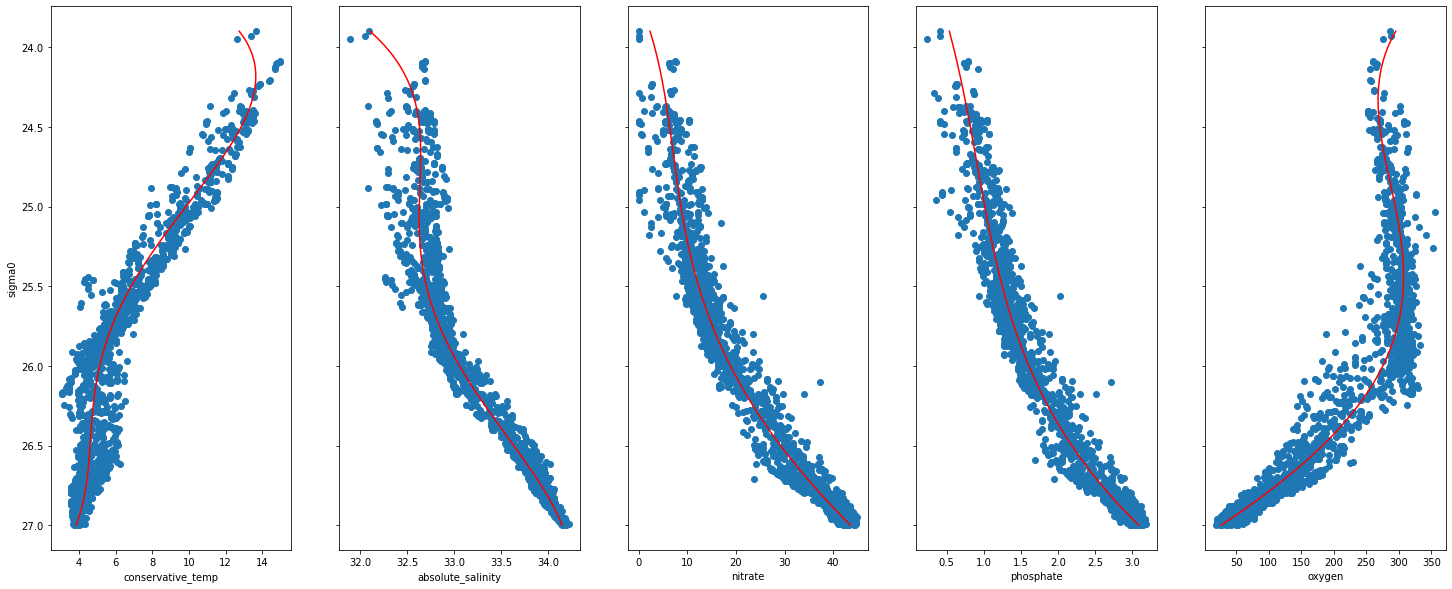

[21.91 21.92 21.93 21.94 21.95 21.96 21.97 21.98 21.99 22.  ]
initial estimate of variance of y[i] is: 0.2963130590376431
With s= 0.08780142895624576 negmse is -3.69404398672535
With s= 0.17560285791249153 negmse is -0.9619111025134484
This is better than best_neg_mse of -3.69404398672535
New lowerbound_s is 0.08780142895624576
With s= 0.35120571582498306 negmse is -0.37342041677232934
This is better than best_neg_mse of -0.9619111025134484
New lowerbound_s is 0.17560285791249153
With s= 0.7024114316499661 negmse is -0.36921112508302195
This is better than best_neg_mse of -0.37342041677232934
New lowerbound_s is 0.35120571582498306
With s= 1.4048228632999322 negmse is -0.3687243933084281
This is better than best_neg_mse of -0.36921112508302195
New lowerbound_s is 0.7024114316499661
With s= 2.8096457265998644 negmse is -0.3686371113749492
This is better than best_neg_mse of -0.3687243933084281
New lowerbound_s is 1.4048228632999322
With s= 5.619291453199729 negmse is -0.3688368858753147

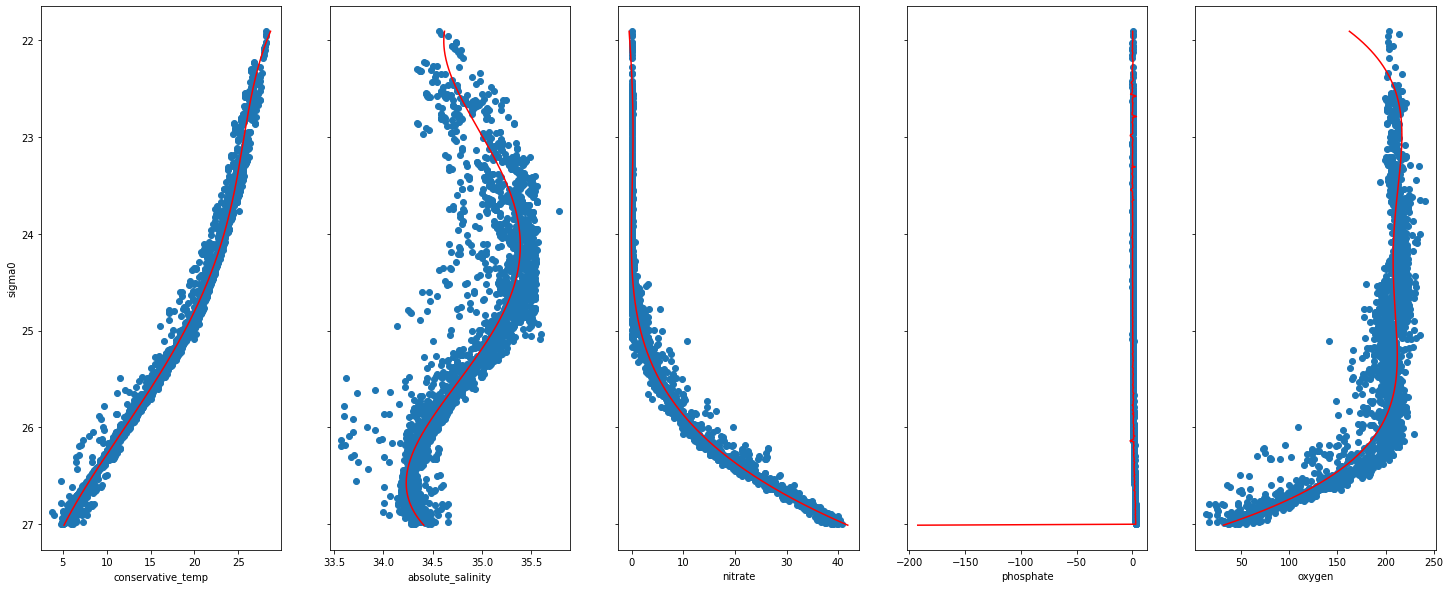

[21.01 21.02 21.03 21.04 21.05 21.06 21.07 21.08 21.09 21.1 ]
initial estimate of variance of y[i] is: 0.07361806244798438
With s= 0.0054196191185953285 negmse is -1.0541551144036435e+17
With s= 0.010839238237190657 negmse is -237.01257658457342
This is better than best_neg_mse of -1.0541551144036435e+17
New lowerbound_s is 0.0054196191185953285
With s= 0.021678476474381314 negmse is -3482.5026165798736
This is no better than best_neg_mse of -237.01257658457342
New upperbound_s is 0.021678476474381314
With s= 0.013549047796488321 negmse is -4475.508163991052
This is no better than best_neg_mse of -237.01257658457342
New upperbound_s is 0.013549047796488321
With s= 0.009484333457541825 negmse is -179420.0470411708
This is no better than best_neg_mse of -237.01257658457342
New lowerbound_s is 0.009484333457541825
With s= 0.011516690627015073 negmse is -5593.407763241085
This is no better than best_neg_mse of -237.01257658457342
New upperbound_s is 0.011516690627015073
With s= 0.010500512

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


With s= 0.00034169131777247227 negmse is -38293.067798611904
This is no better than best_neg_mse of -19850.60069974431
New upperbound_s is 0.00034169131777247227
breaking
initial estimate of variance of y[i] is: 1.0142889641926478
With s= 1.0287821028829944 negmse is -8.31789089714653
With s= 2.057564205765989 negmse is -3.036363794880728
This is better than best_neg_mse of -8.31789089714653
New lowerbound_s is 1.0287821028829944
With s= 4.115128411531978 negmse is -2.991694749528822
This is better than best_neg_mse of -3.036363794880728
New lowerbound_s is 2.057564205765989
With s= 8.230256823063955 negmse is -2.9508689291696415
This is better than best_neg_mse of -2.991694749528822
New lowerbound_s is 4.115128411531978
With s= 16.46051364612791 negmse is -2.974150189855787
This is no better than best_neg_mse of -2.9508689291696415
New upperbound_s is 16.46051364612791
With s= 10.287821028829944 negmse is -2.9406739028993663
This is better than best_neg_mse of -2.9508689291696415
New 

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


With s= 5.505413085849354e-05 negmse is -203061.10077384042
This is no better than best_neg_mse of -33.21209167666482
New lowerbound_s is 5.505413085849354e-05
breaking
initial estimate of variance of y[i] is: 148.2589141770923
With s= 21980.705632970417 negmse is -338.906887123347
With s= 43961.411265940835 negmse is -340.62953224542923
This is no better than best_neg_mse of -338.906887123347
New upperbound_s is 43961.411265940835
With s= 10990.352816485209 negmse is -342.2684244244274
This is no better than best_neg_mse of -338.906887123347
New lowerbound_s is 10990.352816485209
With s= 27475.882041213023 negmse is -339.9966773265186
This is no better than best_neg_mse of -338.906887123347
New upperbound_s is 27475.882041213023
With s= 19233.117428849117 negmse is -337.2547005642626
This is better than best_neg_mse of -338.906887123347
New upperbound_s is 21980.705632970417
With s= 16485.529224727812 negmse is -344.508086667371
This is no better than best_neg_mse of -337.254700564262

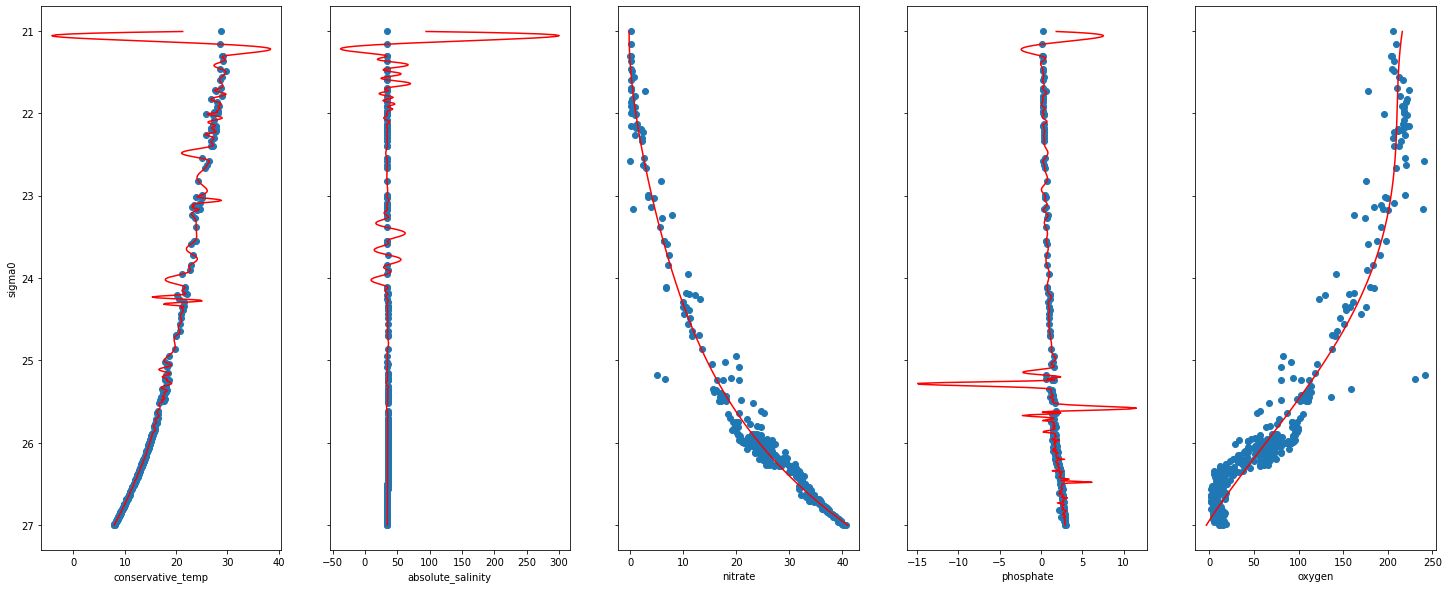

[23.9  23.91 23.92 23.93 23.94 23.95 23.96 23.97 23.98 23.99]
initial estimate of variance of y[i] is: 0.3842095943199393
With s= 0.14761701236749233 negmse is -209.47974465963588
With s= 0.29523402473498467 negmse is -0.43934227963385675
This is better than best_neg_mse of -209.47974465963588
New lowerbound_s is 0.14761701236749233
With s= 0.5904680494699693 negmse is -0.4438776284762686
This is no better than best_neg_mse of -0.43934227963385675
New upperbound_s is 0.5904680494699693
With s= 0.36904253091873085 negmse is -0.49274399446804285
This is no better than best_neg_mse of -0.43934227963385675
New upperbound_s is 0.36904253091873085
With s= 0.2583297716431116 negmse is -0.8430099424434039
This is no better than best_neg_mse of -0.43934227963385675
New lowerbound_s is 0.2583297716431116
With s= 0.31368615128092125 negmse is -0.9293547534209171
This is no better than best_neg_mse of -0.43934227963385675
New upperbound_s is 0.31368615128092125
With s= 0.28600796146201646 negmse i

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


With s= 0.00016795447218499575 negmse is -1.433713127911869e+33
This is no better than best_neg_mse of -12.823952867806742
New lowerbound_s is 0.00016795447218499575
With s= 0.00017608130148426973 negmse is -67.04855641511325
This is no better than best_neg_mse of -12.823952867806742
New upperbound_s is 0.00017608130148426973
With s= 0.00017201788683463275 negmse is -106128.12282415309
This is no better than best_neg_mse of -12.823952867806742
New lowerbound_s is 0.00017201788683463275
breaking
initial estimate of variance of y[i] is: 5.83449186257857
With s= 34.041295294495555 negmse is -6.405150530019695
With s= 68.08259058899111 negmse is -6.403459060172423
This is better than best_neg_mse of -6.405150530019695
New lowerbound_s is 34.041295294495555
With s= 136.16518117798222 negmse is -6.400706530444728
This is better than best_neg_mse of -6.403459060172423
New lowerbound_s is 68.08259058899111
With s= 272.33036235596444 negmse is -6.3812209614973385
This is better than best_neg_ms

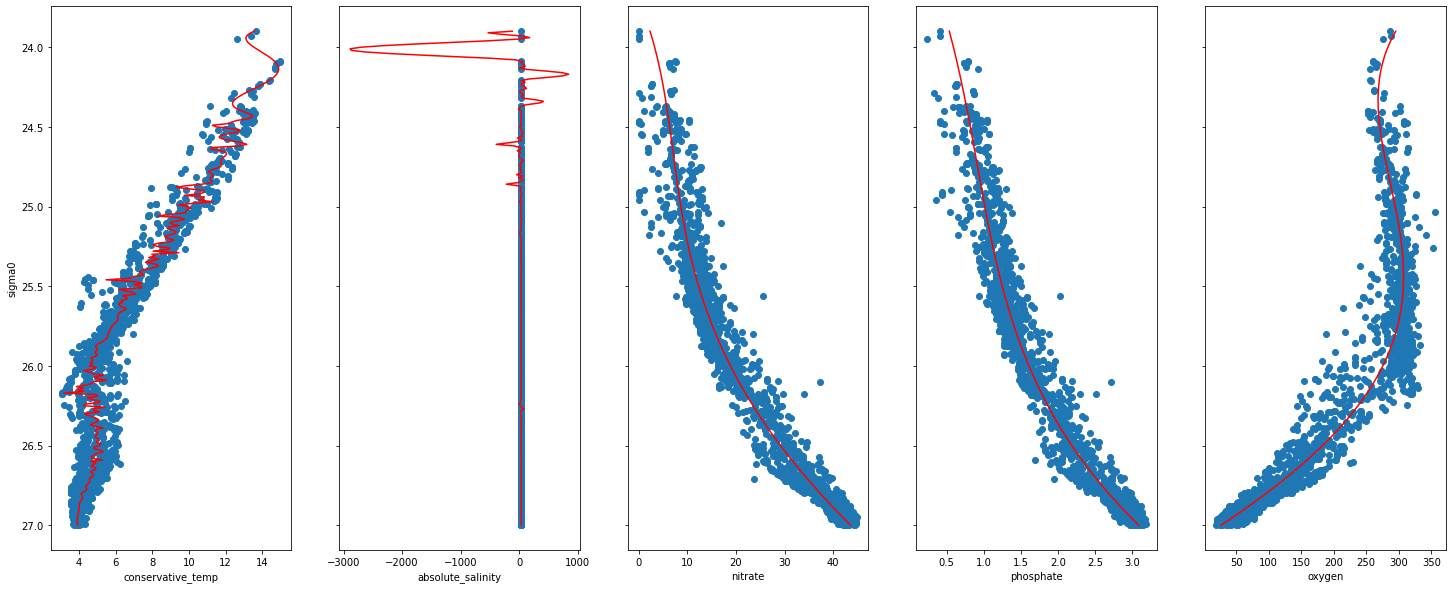

In [39]:
import scipy
import scipy.interpolate
import sklearn
import sklearn.model_selection
import numpy as np
from collections import OrderedDict, defaultdict
from matplotlib import pyplot as plt

STEP_SIZE = 0.01
FEATURES_TO_INTERPOLATE = ["conservative_temp", "absolute_salinity",
                           "nitrate", "phosphate", "oxygen"]


class UnivariateSplineEstimator(object):

    def __init__(self, k, s_per_point):
        self.k=k
        self.s_per_point=s_per_point

    def fit(self, data, targets):
        self.interpolator = scipy.interpolate.UnivariateSpline(
          x=data, y=targets, w=np.ones(len(data)),
          k=self.k, s=self.s_per_point*len(data))
    
    def predict(self, data):
        return self.interpolator(data)
    
    def get_params(self, deep=True):
        return {'k': self.k, 's_per_point':self.s_per_point}


def get_interpolation(x,y,k,intervals):
    #argsort so the cv split will be spread
    argsortx = np.argsort(x)
    x = x[argsortx]
    y = y[argsortx]

    #Use a binary search & cross-validation technique to find a good value for s
    #Get CV splits for x

    #let's try to get an estimate for the variance of y[i]. Separate into bins
    # equal to 1/1000 of the range, then compute variance for each bin.
    minx = np.min(x)
    x_bin_size = (np.max(x) - minx)/100.0
    binstart_to_ys = defaultdict(list)
    for (this_x, this_y) in zip(x,y):
      binstart = minx + int((this_x - minx)/x_bin_size)
      binstart_to_ys[binstart].append(this_y)
    vary = np.mean([np.var(ys_in_bin) for ys_in_bin in binstart_to_ys.values()])
    print("initial estimate of variance of y[i] is:",vary)

    

    def get_cv_score(s_per_point):
        return np.mean(sklearn.model_selection.cross_validate(
            estimator=UnivariateSplineEstimator(k=k, s_per_point=s_per_point),
            X=x, y=y, scoring="neg_mean_squared_error",
            cv=sklearn.model_selection.RepeatedKFold(
                n_splits=2, n_repeats=5))['test_score'])

    s_to_try = np.square(vary) #likely an overestimate
    #initialize
    best_neg_mse = get_cv_score(s_to_try)
    best_s = s_to_try
    print("With s=",s_to_try,"negmse is",best_neg_mse)
    upperbound_s = np.inf
    lowerbound_s = 0

    iternum=0
    while True:
        iternum += 1
        if (upperbound_s == np.inf):
            s_to_try = best_s*2
        elif (lowerbound_s == 0):
            s_to_try = best_s/2.0
        else:
            s_to_try = 0.5*(upperbound_s + lowerbound_s)

        neg_mse = get_cv_score(s_to_try)
        print("With s=",s_to_try,"negmse is",neg_mse)
        
        #if the neg_mse is worse, use this to tighten the bounds for the binary
        # search
        if (neg_mse <= best_neg_mse):
            print("This is no better than best_neg_mse of",best_neg_mse)
            if (s_to_try >= best_s):
                upperbound_s = s_to_try
                print("New upperbound_s is", upperbound_s)
            else:
                lowerbound_s = s_to_try
                print("New lowerbound_s is", lowerbound_s)
        else:
            print("This is better than best_neg_mse of",best_neg_mse)
            if (s_to_try >= best_s):
                lowerbound_s = best_s
                print("New lowerbound_s is", lowerbound_s)
            if (s_to_try < best_s):
                upperbound_s = best_s
                print("New upperbound_s is", upperbound_s)
            best_s = s_to_try
            best_neg_mse = neg_mse

        if (np.abs(upperbound_s - lowerbound_s) < (vary/len(x))):
            print("breaking")
            best_estimator = UnivariateSplineEstimator(k=k,
                                                       s_per_point=best_s)
            best_estimator.fit(data=x, targets=y)
            break
        if iternum==100:
            assert False

    return best_estimator.predict(intervals)


def get_median_y_per_x(x,y):
  #deduplication
  x_to_ys = defaultdict(list)
  for an_x, a_y in zip(x, y):
    x_to_ys[an_x].append(a_y)

  ys = []
  xs = []
  for x in sorted(x_to_ys.keys()):
    xs.append(x)
    ys.append(np.median(x_to_ys[x]))
  
  return np.array(xs), np.array(ys)


def filter_df_for_range_and_interpolate(watertype_name, big_df,
                                        k,
                                        depth_min=-np.inf, depth_max=np.inf,
                                        lat_min=-np.inf, lat_max=np.inf,
                                        lon_min=-np.inf, lon_max=np.inf,
                                        sig0_min=-np.inf, sig0_max=np.inf, ):
  filtered_df = df[(df['latitude'] >= lat_min) & (df['latitude'] <= lat_max)
     & (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)
     & (df['sigma0'] >= sig0_min) & (df['sigma0'] <= sig0_max)
     & (df['depth'] >= depth_min) & (df['depth'] <= depth_max) ]
  
  orig_x = np.array(filtered_df['sigma0'])
  
  x_min = int(np.ceil(min(orig_x)/STEP_SIZE))*STEP_SIZE
  x_max = int(max(orig_x)/STEP_SIZE)*STEP_SIZE
  intervals = np.array([x_min+(step*STEP_SIZE) for step in 
                       range(int((x_max-x_min)/STEP_SIZE) + 2)])
  print(intervals[:10])

  interpolated_feature_dict = OrderedDict()
  interpolated_feature_dict["sigma0"] = intervals

  fig, ax = plt.subplots(nrows=1, ncols=len(FEATURES_TO_INTERPOLATE),
                         sharey=True,
                         figsize=(len(FEATURES_TO_INTERPOLATE)*5, 10))
  for idx,feature_name in enumerate(FEATURES_TO_INTERPOLATE):
    orig_y = np.array(filtered_df[feature_name])
    #filter out nans
    filt_x = orig_x[np.isfinite(orig_y)]
    filt_y = orig_y[np.isfinite(orig_y)]

    x,y = get_median_y_per_x(x=filt_x,y=filt_y)
    
    interpolated_features = get_interpolation(x=x,
        y=y,
        k=k,
        intervals=intervals)
    
    interpolated_feature_dict[feature_name] = interpolated_features
    plt.sca(ax[idx])
    plt.xlabel(feature_name)
    #plt.scatter(orig_y, orig_x)
    plt.scatter(y, x)
    plt.plot(interpolated_features, intervals, color="red")

  plt.sca(ax[0])
  plt.ylabel("sigma0")
  plt.ylim(plt.ylim()[1], plt.ylim()[0])
  print(watertype_name)
  plt.show()

  pandas.DataFrame(interpolated_feature_dict).to_csv(watertype_name+".csv", index=False)

#big_df refers to the glodap df.
#s controls smoothing of the spline
#k controls the degree of the spline. k=4 is a quartic spline.
# Cubic spline seemed less reliable

filter_df_for_range_and_interpolate(watertype_name="PSUW",
                                    big_df=df, lat_min=50, lat_max=58,
                                    lon_min=-155, lon_max=-140,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000,
                                    k=4
                                    )

filter_df_for_range_and_interpolate(watertype_name="ENPCW",
                                    big_df=df, lat_min=16, lat_max=26,
                                    lon_min=-170, lon_max=-140,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000*0.5,
                                    k=4
                                    )

filter_df_for_range_and_interpolate(watertype_name="ESSW",
                                    big_df=df, lat_min=-5, lat_max=5,
                                    lon_min=-90, lon_max=-80,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000,
                                    k=4
                                    )

filter_df_for_range_and_interpolate(watertype_name="SPCW",
                                    big_df=df, lat_min=50, lat_max=58,
                                    lon_min=-155, lon_max=-140,
                                    sig0_min=21, sig0_max=27,
                                    #s=1000000,
                                    k=4
                                    )
